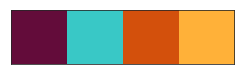

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import my spotify data
songs = pd.read_csv("../datasets/mySongsDataset.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 11 columns):
name            822 non-null object
artist          822 non-null object
id              822 non-null object
danceability    822 non-null float64
energy          822 non-null float64
loudness        822 non-null float64
speechiness     822 non-null float64
acousticness    822 non-null float64
tempo           822 non-null float64
liveness        822 non-null float64
valence         822 non-null float64
dtypes: float64(8), object(3)
memory usage: 70.7+ KB


In [3]:

songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,SPEEDBOAT,Denzel Curry,2FTOLKjQUswhpdMFq15Raf,0.925,-7.587,0.1310,0.0604,0.358
1,Rodeo,Lil Nas X,4ak7xjvBeBOcJGWFDX9w5n,0.706,-5.614,0.0324,0.1390,0.465
2,Summertime Magic,Childish Gambino,4j3GWI86JvSaF0BLdmgcfF,0.760,-7.374,0.0569,0.0129,0.106
3,Rwm [run With Me],House of Pharaohs,03RZdoidDQPpVGnSxPW2YO,0.763,-6.094,0.2570,0.1160,0.340
4,Price On My Head (feat. The Weeknd),NAV,4hqOmrCCJKyiuwDexd8c2t,0.768,-6.104,0.1360,0.3840,0.336


In [4]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,822.000000,822.000000,822.000000,822.000000,822.000000
mean,0.714193,-7.101165,0.156120,0.234338,0.184698
std,0.131895,3.188877,0.121395,0.230739,0.145412
min,0.141000,-35.422000,0.025100,0.000136,0.023300
25%,0.635250,-8.150750,0.056600,0.053275,0.095550
50%,0.735000,-6.656500,0.113500,0.172000,0.123500
75%,0.812750,-5.183000,0.234500,0.341250,0.232750
max,0.964000,-0.155000,0.920000,0.995000,0.894000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d43fe48>,
      dtype=object)

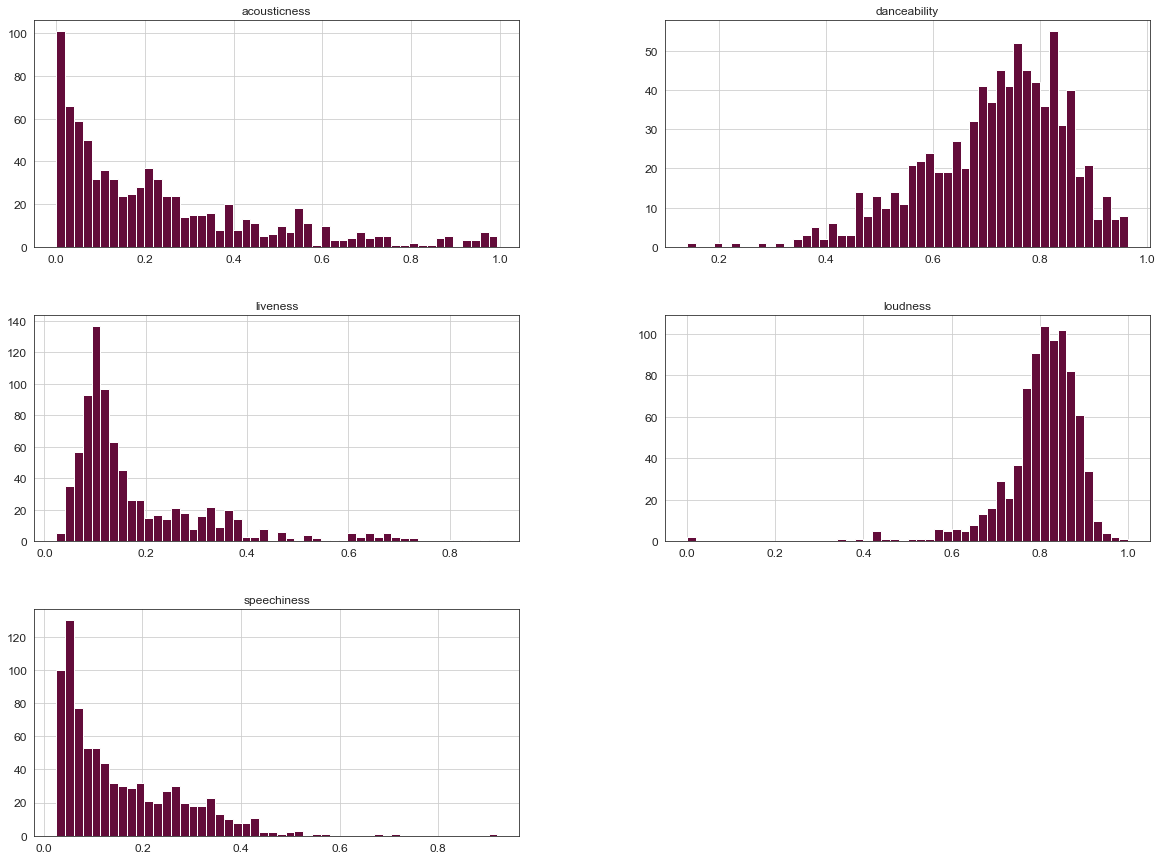

In [5]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [6]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [7]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)



In [8]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [9]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.38838474636235926)
For n_clusters = 3, silhouette score is 0.29432771680771025)
For n_clusters = 4, silhouette score is 0.28357050442816784)
For n_clusters = 5, silhouette score is 0.23669850729527186)
For n_clusters = 6, silhouette score is 0.21548849387943386)
For n_clusters = 7, silhouette score is 0.21703545305045974)
For n_clusters = 8, silhouette score is 0.21134781268673553)
For n_clusters = 9, silhouette score is 0.21780161214910143)
For n_clusters = 10, silhouette score is 0.2178225470446984)
For n_clusters = 11, silhouette score is 0.21842892845390355)
For n_clusters = 12, silhouette score is 0.21658228036211927)
For n_clusters = 13, silhouette score is 0.22110157736485705)
For n_clusters = 14, silhouette score is 0.23542565787442324)


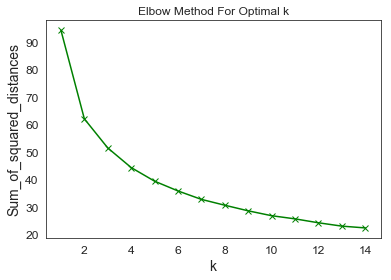

In [10]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


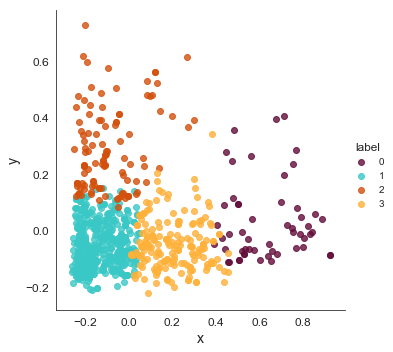

In [14]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [15]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

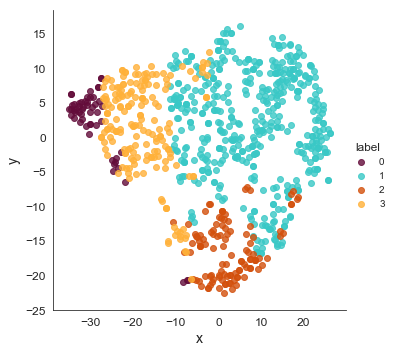

In [16]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [17]:
pca.explained_variance_ratio_

array([0.49127267, 0.19507364])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [18]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.160294 -0.202982    -0.013570      0.965367 -0.031398
PC-2     -0.357319 -0.005390     0.228586     -0.027812  0.905135


# Next step lets explore each of the 4 clusters and see what songs they contain

In [19]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    471
3    186
2    111
0     54
Name: label, dtype: int64

In [20]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
641,마담 (Madame),Zion.T,1zZqfWosLsfirzQuY2TPQQ,0.514,0.579012,0.0414,0.976,0.0923,0
734,Freddie Freeloader,Miles Davis,2x91iJc0UkFcjRMEZ2CoWB,0.638,0.555505,0.0347,0.703,0.1180,0
354,Hope,XXXTENTACION,2ZRo7axmMPeSVUvDbGkJah,0.592,0.831968,0.0603,0.661,0.1460,0
343,the remedy for a broken heart (why am I so in ...,XXXTENTACION,4UKCKdYiLN6IMA5ZESUTL7,0.699,0.687045,0.0993,0.779,0.1370,0
88,Poem (Shhh),Colde,4UyV2ZMo5NpCcO0u3xX8uB,0.821,0.688207,0.0424,0.751,0.1560,0
759,Première Gymnopédie,Erik Satie,4jep6dMPP0z7HrN375InoL,0.593,0.000000,0.0699,0.995,0.0814,0
353,changes,XXXTENTACION,7AFASza1mXqntmGtbxXprO,0.669,0.718916,0.0290,0.883,0.0984,0
655,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",Kyle Landry,2xFBrGSZ4mSURd8p5IU4ed,0.406,0.428219,0.0515,0.964,0.0964,0
350,love yourself (interlude),XXXTENTACION,1Znlc3UZAbSodFaMBjdpsX,0.746,0.622395,0.1090,0.674,0.5290,0
45,Petite fleur,Jill Barber,0oMp06EjwhYFvDB33VCiW3,0.616,0.731222,0.0329,0.860,0.0945,0


In [21]:
songs[songs['label']==1].head(15)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
571,No Problem (feat. Lil Wayne & 2 Chainz),Chance the Rapper,0v9Wz8o0BT8DU38R4ddjeH,0.652,0.857175,0.1740,0.15600,0.1230,1
260,A$AP Forever,A$AP Rocky,1YmF9PvLhIISIANoMLIYGq,0.469,0.820370,0.1220,0.22400,0.1300,1
269,Θ. Macarena,Damso,2ewjMyCbNv2X1dB2qIDCwD,0.764,0.771770,0.0709,0.20900,0.0494,1
263,Big Shot (with Travis Scott),Kendrick Lamar,5A4anUcHrgnqH9UorW9XbG,0.859,0.747214,0.2170,0.00699,0.0979,1
384,Cupido (feat. Quavo),Sfera Ebbasta,7bklDXyWkNYQi6tBXvf9Wo,0.798,0.857629,0.0386,0.06730,0.1040,1
689,Emotions,Mariah Carey,0cELvuwJW1acISUHYB6suj,0.741,0.805654,0.0359,0.04110,0.0233,1
32,Chanel,Di-Meh,4AoLo6CrJR7vYuSiiJeSGk,0.797,0.749454,0.1070,0.07920,0.1560,1
455,Relationship (feat. Future),Young Thug,25oOaleife6E2MIKmFkPvg,0.842,0.824737,0.0627,0.00252,0.1240,1
708,Are You That Somebody,Aaliyah,4QDAMBiRAZXK20zDCQiiuE,0.852,0.802960,0.1720,0.16100,0.0999,1
112,Intro (Doug Funny),Azizi Gibson,2NtpDCsfFuWc7mm2hFCw4H,0.716,0.784926,0.0385,0.02210,0.1440,1


In [22]:
songs[songs['label']==2].head(30)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
772,Go Get It,T.I.,3ZfACixzMNAbRcpGwEkLRe,0.366,0.843253,0.2460,0.00212,0.398,2
511,Wicked,Future,6BbINUfGabVyiNFJpQXn3x,0.718,0.837128,0.0706,0.00191,0.385,2
669,Guap,Big Sean,5KliOPpfkFJzNXJpmjgTR7,0.650,0.839737,0.1720,0.31100,0.412,2
249,Shooters,Tory Lanez,09BhVtcw1sVubMNHLM5I4v,0.630,0.808603,0.0517,0.10600,0.714,2
216,Orso (off top),¿Téo?,3noZqIAtdmzGPGZo211EjI,0.709,0.733519,0.0498,0.26300,0.361,2
444,instagram,DEAN,4LjlYndpXP76iDArlJaWXT,0.463,0.828735,0.1450,0.19600,0.284,2
31,Photosynthesis,Saba,3DlgDXIYtnWtJKiB8bZQMv,0.777,0.766411,0.2700,0.53600,0.593,2
146,I Know There's Gonna Be (Good Times),Jamie xx,6393Du1axGG1NvAMq0OcfU,0.458,0.723141,0.2200,0.12000,0.477,2
738,막을 올리며 Encore,Epik High,6r97KRZqC4MZioqRhXrNYJ,0.583,0.829642,0.2890,0.14100,0.731,2
671,Father Stretch My Hands Pt. 1,Kanye West,1947qHiGxQpqleCxLphoOH,0.712,0.880029,0.0564,0.13500,0.544,2


In [34]:
songs[songs['label']==3].head(40)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
176,Yo Darlin',NSG,7Lh7cJzYuo4U5Uq687rLSm,0.674,0.861797,0.2460,0.303,0.1400,3
266,SWEET,BROCKHAMPTON,2DgMxFMUQRPthW4ROhjen1,0.718,0.834066,0.2230,0.543,0.1160,3
21,I Wish I Missed My Ex,Mahalia,4jwP0pxx7su04FYc6J12EQ,0.680,0.859302,0.0607,0.319,0.1580,3
420,Corazón,Maluma,4lESS6vuruP6a79KWRaQou,0.871,0.851249,0.1220,0.283,0.1620,3
375,pay stub,gianni & kyle,6UlzoN4Vv5YM1oLJlsZcci,0.820,0.775172,0.1280,0.350,0.3230,3
818,Big Dusty,Joey Bada$$,5YHWLmV91wCzgfeKW6rH8X,0.677,0.799189,0.4940,0.577,0.1380,3
761,Bemba Colora,Reyes De Cancion,4tS5HJSVRyutrYAnVC74Py,0.802,0.604134,0.0410,0.572,0.1040,3
55,Nightfall,Lester Nowhere,6hJIhtBrsJB7ywzzvkhFFA,0.517,0.819094,0.0309,0.536,0.0756,3
202,do u even miss me at all?,gianni & kyle,7yGUFMHTVa71SBBhDWjZ46,0.819,0.801372,0.0768,0.384,0.0899,3
181,The Way,Ariana Grande,0S4RKPbRDA72tvKwVdXQqe,0.645,0.913432,0.1130,0.294,0.0759,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d947630>,
      dtype=object)

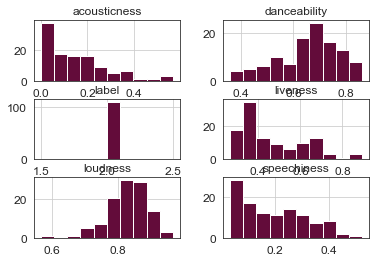

In [24]:
songs[songs['label']==2].hist()

In [33]:
songs[songs['label']==3].mean()

danceability    0.740957
loudness        0.797812
speechiness     0.174659
acousticness    0.441355
liveness        0.144303
label           3.000000
dtype: float64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [37]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 14   0   0   4]
 [  0 164   0   0]
 [  0   1  34   1]
 [  1   0   1  52]]


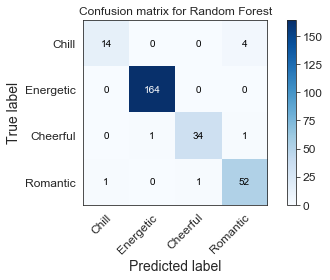

In [38]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [62]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.06703729205210224),
 ('loudness', 0.06320214769610095),
 ('speechiness', 0.03769455303598156),
 ('acousticness', 0.5476709899131079),
 ('liveness', 0.2843950173027072)]

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[ 11   0   0   7]
 [  0 160   3   1]
 [  0   4  31   1]
 [  0   5   1  48]]


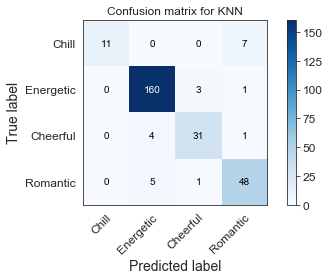

In [42]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [43]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[  7   0   0  11]
 [  0 164   0   0]
 [  0  11  24   1]
 [  0   7   0  47]]


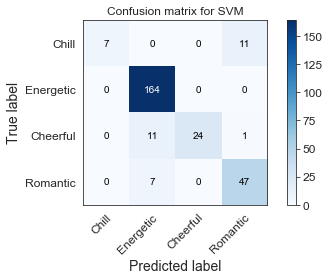

In [44]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [45]:
from sklearn.neural_network import MLPClassifier

In [47]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/Users/SylvesterCardorelle/ml/env/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [48]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[  9   0   0   9]
 [  0 164   0   0]
 [  0   5  30   1]
 [  1   4   0  49]]


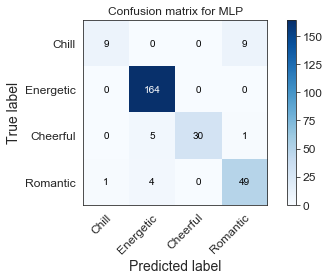

In [50]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [53]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.90      0.50      0.64        18
   Energetic       0.95      1.00      0.97       164
    Cheerful       1.00      0.83      0.91        36
    Romantic       0.83      0.91      0.87        54

   micro avg       0.93      0.93      0.93       272
   macro avg       0.92      0.81      0.85       272
weighted avg       0.93      0.93      0.92       272
MLP


In [54]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       1.00      0.39      0.56        18
   Energetic       0.90      1.00      0.95       164
    Cheerful       1.00      0.67      0.80        36
    Romantic       0.80      0.87      0.83        54

   micro avg       0.89      0.89      0.89       272
   macro avg       0.92      0.73      0.78       272
weighted avg       0.90      0.89      0.88       272
SVM


In [55]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       1.00      0.61      0.76        18
   Energetic       0.95      0.98      0.96       164
    Cheerful       0.89      0.86      0.87        36
    Romantic       0.84      0.89      0.86        54

   micro avg       0.92      0.92      0.92       272
   macro avg       0.92      0.83      0.86       272
weighted avg       0.92      0.92      0.92       272
KNN


In [56]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       0.93      0.78      0.85        18
   Energetic       0.99      1.00      1.00       164
    Cheerful       0.97      0.94      0.96        36
    Romantic       0.91      0.96      0.94        54

   micro avg       0.97      0.97      0.97       272
   macro avg       0.95      0.92      0.94       272
weighted avg       0.97      0.97      0.97       272
forest
